

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [175]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])


In [176]:
from scipy.stats import shapiro
stat, p = shapiro(GPU1)
print('Statistics GPU1=%.3f, p=%.3f' % (stat, p))

Statistics GPU1=0.854, p=0.020


In [177]:
from scipy.stats import shapiro
stat, p = shapiro(GPU2)
print('Statistics GPU2=%.3f, p=%.3f' % (stat, p))

Statistics GPU2=0.917, p=0.175


In [178]:
import statistics as stats
print("Std. Dev of GPU1", stats.stdev(GPU1[0]))
print("Std. Dev of GPU2", stats.stdev(GPU2[0]))

from scipy.stats import levene
levene(GPU1, GPU2)

Std. Dev of GPU1 1.1751393027860062
Std. Dev of GPU2 1.1872336794093274


LeveneResult(statistic=array([0.05511811]), pvalue=array([0.81609376]))

In [179]:
from scipy.stats import ttest_ind
ttest = ttest_ind(GPU1, GPU2, equal_var=True)
ttest

Ttest_indResult(statistic=array([-2.62762951]), pvalue=array([0.01379428]))

In [180]:
#Answer
# Reject NULL Hypothesis and accept Alternate Hypothesis

[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [181]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [182]:
from scipy.stats import shapiro
stat, p = shapiro(GPU1)
print('Statistics GPU1=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(GPU3)
print('Statistics GPU3=%.3f, p=%.3f' % (stat, p))

print("Std. Dev of GPU1", stats.stdev(GPU1[0]))
print("Std. Dev of GPU3", stats.stdev(GPU3[0]))


levene(GPU1, GPU3)

ttest = ttest_ind(GPU1, GPU3, equal_var=False)
ttest

#Answer
# No significant difference. Accept NULL Hypothesis

Statistics GPU1=0.854, p=0.020
Statistics GPU3=0.890, p=0.066
Std. Dev of GPU1 1.1751393027860062
Std. Dev of GPU3 1.486446705914413


Ttest_indResult(statistic=array([-1.49889438]), pvalue=array([0.14568331]))

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [184]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])


Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [185]:
levene(e1, e2, e3)
# Variance test is satisfied hence moving to ANOVA
from scipy.stats import f_oneway
 
F, p = f_oneway(
    e1,
    e2,
    e3
    )
print(F)
print(p)
#Answer: Not significently different

[2.51357623]
[0.13574645]


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [186]:
#Type 1 error is typically a False Positive where NULL Hypothesis is True 
#and The Alternate Hypothesis tells to Reject the NULL Hypothesis

In [187]:
#Type 2 error is typically a False Negative where NULL Hypothesis is False 
#and The Alternate Hypothesis tells to Accept the NULL Hypothesis

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [188]:
# NULL Hypothesis - Waiting time hasn't changed from previous month

In [189]:
# Alternate Hypothesis - Waiting time has changed from the previous month

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [190]:
from scipy.stats import binom


In [191]:
binom.pmf([0, 1, 2, 3, 4, 5, 6, 7],n=20,p=0.7)



array([3.48678440e-11, 1.62716605e-09, 3.60688475e-08, 5.04963865e-07,
       5.00755833e-06, 3.73897689e-05, 2.18106985e-04, 1.01783260e-03])

In [192]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [193]:
df=pd.read_csv("C:\\Users\\kalya\\Downloads\\iris.DATA",names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"])

In [194]:
import random as rn
import numpy as np
df.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
16,5.4,3.9,1.3,0.4,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [196]:
df.describe()
#df.dtypes
# Check Missing Values
df.isnull().values.any()
# Replace Missing values with Median
df.fillna(df.median(), inplace=True)


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [197]:
df.dtypes
df["class"] = df["class"].astype('category')
df.dtypes

sepal length in cm     float64
sepal width in cm      float64
petal length in cm     float64
petal width in cm      float64
class                 category
dtype: object

## Question 4

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [198]:
df.describe()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [199]:
df.var()

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
dtype: float64

In [200]:
#No variables to drop as the Variance is not less than 0.1

## Question 5

*Plot the scatter matrix for all the variables.*

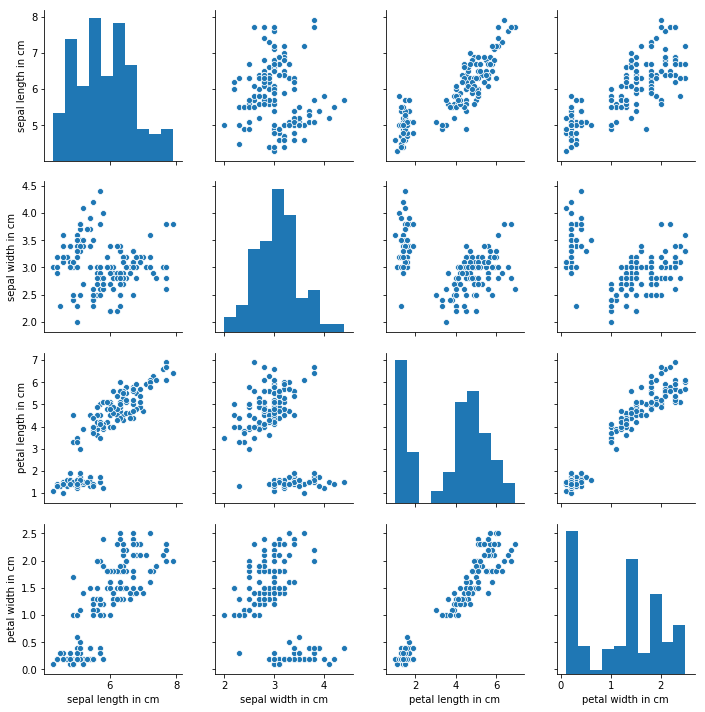

In [201]:
import seaborn as sns
sns.pairplot(df)
#df[['sepal length in cm', 'sepal width in cm','petal length in cm', 'petal width in cm']].cov()

## Question 6 - Model

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
feature_df = df.drop(labels= "class" , axis = 1)
feature_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [204]:
df_labels = df["class"]

In [205]:
df_labels

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [206]:
# Split X and y into training and test set in 70:30 ratio

feature_df_train, feature_df_test, df_labels_train, df_labels_test = train_test_split(feature_df, df_labels, test_size=0.30, random_state=9)



In [207]:
from sklearn.neighbors import KNeighborsClassifier# Call Nearest Neighbour algorithm

mList = [3,5,9]
for k in mList:
    NNH = KNeighborsClassifier(n_neighbors= k  )
    NNH.fit(feature_df_train, df_labels_train)
    predicted_labels = NNH.predict(feature_df_test)
    print("Score for K value: {} is {}".format(k,NNH.score(feature_df_test, df_labels_test)) ) 
     
    
    print("Accuracy for K value: %d" % k) 
    print(metrics.confusion_matrix(df_labels_test, predicted_labels))

Score for K value: 3 is 1.0
Accuracy for K value: 3
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
Score for K value: 5 is 1.0
Accuracy for K value: 5
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
Score for K value: 9 is 0.9777777777777777
Accuracy for K value: 9
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]


## Question 7 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [208]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, feature_df_train, df_labels_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 9


## Question 8

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

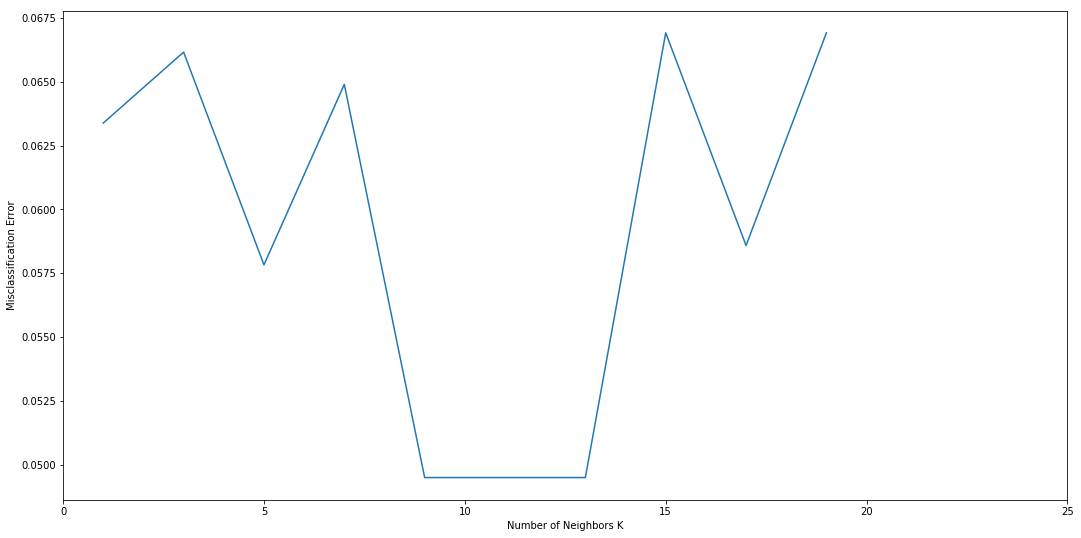

In [209]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()